## 필수과제 1
- simpleimputer 사용
(다양하게 통계치( 평균, 최빈값이 등등 ) 결과가 어떤식으로 바뀌는지 mpg 데이터를 가지고 확인)

In [1]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
df=sns.load_dataset('mpg')

In [2]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# horsepower 결측치 임의로 채움
df.dropna(inplace = True)

In [5]:
df_x= df[['cylinders','displacement','horsepower','weight']]

In [6]:
## 결측치를 임의로 만들어야 하는 상황
msv=np.random.randint(0,389, size=30) # 30개의 무작위 정수를 msv 배열에 저장
df_x.iloc[msv] = np.nan # msv 행 인덱스를 사용하여 지정된 인덱스에 np.nan 값 부여
# 결측치 만들기
df_x.isna().sum()

cylinders       27
displacement    27
horsepower      27
weight          27
dtype: int64

In [10]:
df_t = pd.concat([df_x,df['mpg']], axis = 1)
df_t1 = pd.concat([df_x,df['mpg']], axis = 1)
df_t2 = pd.concat([df_x,df['mpg']], axis = 1)

### simpleimputer 사용 결측값 채우기

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# SimpleImputer 인스턴스 생성
mean_imputer = SimpleImputer()
median_imputer = SimpleImputer(strategy='median', fill_value=None, verbose=0, copy=True, add_indicator=False)
most_imputer = SimpleImputer(strategy='most_frequent', fill_value=None, verbose=0, copy=True, add_indicator=False)
# strategy가 constant(지정값)인 경우에는 fill_value값을 적어줘야 한다.

In [13]:
df_mean = pd.DataFrame(mean_imputer.fit_transform(df_t))
df_median = pd.DataFrame(median_imputer.fit_transform(df_t1))
df_most = pd.DataFrame(most_imputer.fit_transform(df_t2))

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [17]:
# 확인
df_mean.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [20]:
#컬럼명 바꿔주기
df_mean.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_median.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_most.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']

### 회귀분석

- simpleimputer(strategy = 'mean')

In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_mean.drop('mpg',axis = 1), df_mean['mpg'],test_size = 0.3, random_state = 111)
fit_train1 = sm.OLS(y_train, X_train)
fit_train1 = fit_train1.fit()

mse_mean = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(X_test))
mse_mean

55.81019696844524

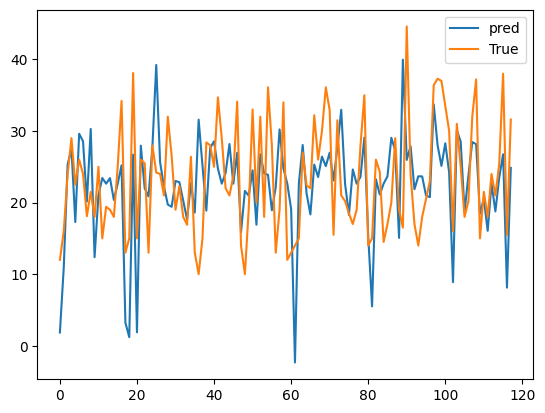

In [24]:
plt.plot(np.array(fit_train1.predict(X_test)), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

- simpleimputer(strategy = 'median')

In [32]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # 회귀분석에 필요한 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_median.drop('mpg', axis = 1),df_median['mpg'], test_size = 0.3, random_state = 111)
fit_train2 = sm.OLS(y_train, X_train)
fit_train2 = fit_train2.fit()

mse_median = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(X_test))
mse_median

55.184298571358525

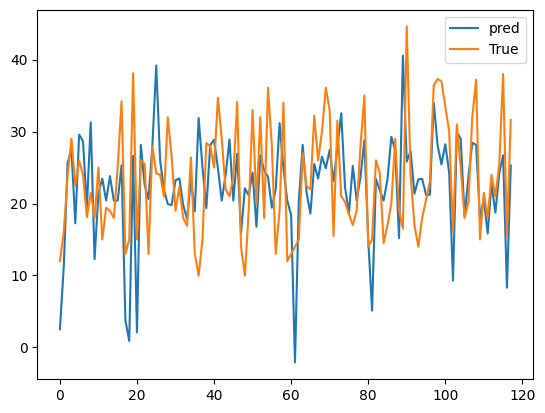

In [28]:
plt.plot(np.array(fit_train2.predict(X_test)), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

- simpleimputer(strategy = 'most_frequent')

In [30]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # 회귀분석에 필요한 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_most.drop('mpg', axis = 1),df_most['mpg'], test_size = 0.3, random_state = 111)
fit_train3 = sm.OLS(y_train, X_train)
fit_train3 = fit_train3.fit()

mse_most = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(X_test))
mse_most

58.046742363976236

### 결과비교

In [33]:
print(mse_mean, 'mean')
print(mse_median, 'median')
print(mse_most, 'most_frequent')

55.81019696844524 mean
55.184298571358525 median
58.046742363976236 most_frequent
